# Proyecto Arboles de Decisión y Bosques Aleatorios - Solución

Para este proyecto, exploraremos los datos disponibles públicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta a personas que necesitan dinero (prestatarios) con personas que tienen dinero (inversores). Con suerte, como inversor, querrá invertir en personas que mostraran un perfil de tener una alta probabilidad de devolver el dinero. Intentaremos crear un modelo que ayude a predecir esto.

Lending Club tuvo un [año muy interesante en 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), así que revisemos algunos de sus datos y tengamos en cuenta el contexto. Estos datos son de antes de que se hicieran públicos.

Usaremos datos de préstamos de 2007-2010 y trataremos de clasificar y predecir si el prestatario devolvió el préstamo en su totalidad o no. Puede descargar los datos desde [aquí](https://www.lendingclub.com/info/download-data.action) o simplemente usar el csv ya proporcionado. Se recomienda que utilice el csv proporcionado, ya que se ha limpiado de valores NA.

Esto es lo que representan las columnas:
* credit.policy: 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com, y 0 en caso contrario.
* purpose: El propósito del préstamo (toma los valores "tarjeta_de_crédito", "consolidación_deuda", "educativo", "compra_principal", "pequeña_empresa" y "todos_otros").
* tasa int .: la tasa de interés del préstamo, como una proporción (una tasa del 11% se almacenaría como 0,11). A los prestatarios que LendingClub.com considera más riesgosos se les asignan tasas de interés más altas.
* installment: las cuotas mensuales adeudadas por el prestatario si el préstamo está financiado.
* log.annual.inc: El logaritmo natural de los ingresos anuales autoinformados del prestatario.
* dti: La relación deuda-ingresos del prestatario (monto de la deuda dividido por los ingresos anuales).
* fico: La calificación crediticia FICO del prestatario.
* days.with.cr.line: La cantidad de días que el prestatario ha tenido una línea de crédito.
* revol.bal: El saldo renovable del prestatario (monto pendiente de pago al final del ciclo de facturación de la tarjeta de crédito).
* revol.util: Tasa de utilización de la línea renovable del prestatario (la cantidad de la línea de crédito utilizada en relación con el crédito total disponible).
* inq. last.6mes: número de consultas del prestatario por parte de los acreedores en los últimos 6 meses.
* delinq.2yrs: El número de veces que el prestatario ha estado atrasado 30+ días en un pago en los últimos 2 años.
* pub.rec: el número de registros públicos despectivos del prestatario (declaraciones de quiebra, gravámenes fiscales o sentencias).
* not.fully.paid: la variable objetivo, pagado completamente o no (0 pago completamente, 1 no pago completamente)




# Importar librerías

**Importe las librerías habituales para dataframes y gráficos. Puede importar sklearn más adelante.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

**Use pandas para leer loan_data.csv como un dataframe llamado pr.**

In [2]:
pr = pd.read_csv('loan_data.csv')

**Chequea la info(), head() y describe() de pr.**

In [3]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
pr.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
pr.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análisis exploratorio de datos

¡Hagamos algunas visualizaciones de datos! Usaremos las capacidades de trazado integradas de seaborn y pandas, pero siéntase libre de usar cualquier librería que desee. No se preocupe por la coincidencia de colores, solo preocúpese por tener la idea principal de cada gráfico.

**Cree un histograma de dos distribuciones FICO una encima de la otra, una para cada resultado de la póliza de crédito (credit.policy).**

* Nota: Esto es un poco complicado, no dude en consultar las soluciones. Probablemente necesitará una línea de código para cada histograma, también recomiendo usar pandas integrados en .hist () *

Text(0.5, 0, 'FICO')

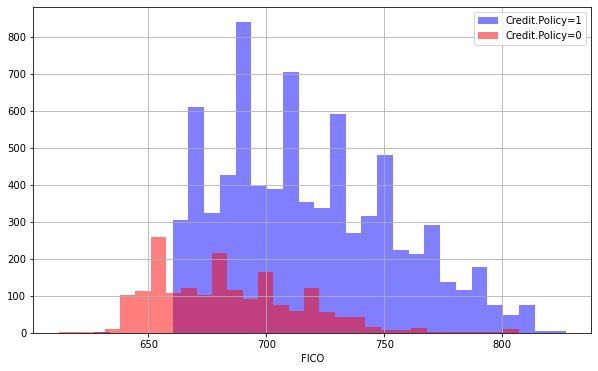

In [6]:
plt.figure(figsize=(10,6))
pr[pr['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
pr[pr['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Podemos observar que los que cumplen con la politica de crédito tienen un score mayor a 670 aproximadamente.**

**Cree una gráfica similar, excepto que esta vez seleccione por la columna no pagado completamente (not.fully.paid).**

Text(0.5, 0, 'FICO')

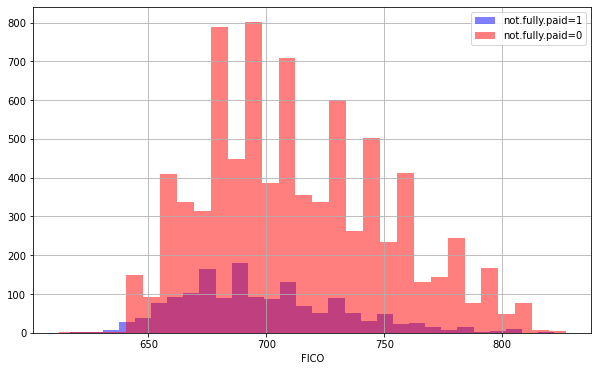

In [7]:
plt.figure(figsize=(10,6))
pr[pr['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
pr[pr['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Cree una gráfica de recuento utilizando seaborn que muestre los recuentos de préstamos por propósito (purpose), con el tono de color definido por not.fully.paid.**

<AxesSubplot:xlabel='purpose', ylabel='count'>

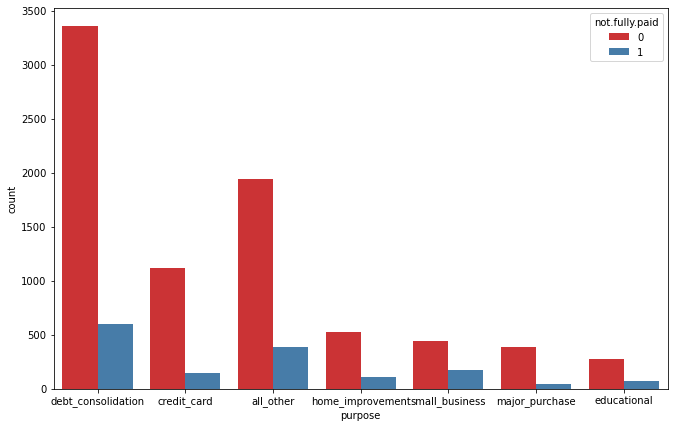

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=pr,palette='Set1')

**Veamos la tendencia entre la puntuación FICO y la tasa de interés. Recrea la siguiente trama conjunta. Utilice un jointplot**

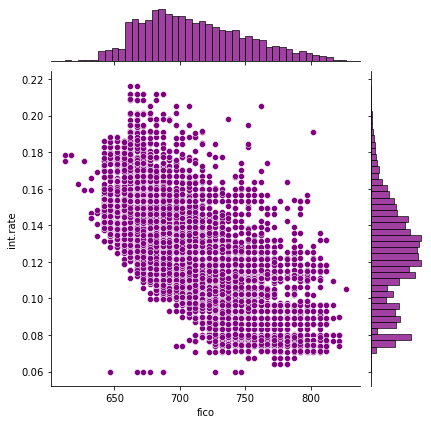

In [9]:
sns.jointplot(x='fico',y='int.rate',data=pr,color='purple')

**Cree los siguientes gráficos para ver si la tendencia difiere entre las variables no completamente pagado y la política de crédito. Consulte la documentación de lmplot() si no puede averiguar cómo separarlo en columnas.**

<Figure size 792x504 with 0 Axes>

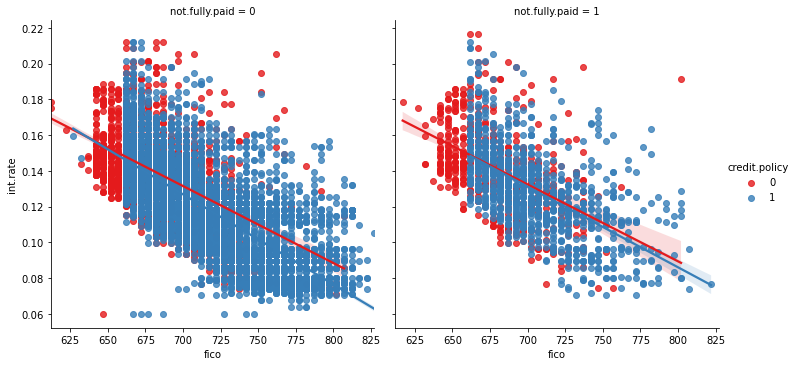

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=pr,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Configuración de los datos

¡Preparémonos para configurar nuestros datos para nuestro modelo de clasificación de arbol de decisión!

**Vuelva a consultar pr.info().**

In [11]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Características categóricas

Observe que la columna **purpose** es categórica

Eso significa que necesitamos transformarlos usando variables dummies para que sklearn pueda entenderlos. Hagamos esto en un paso limpio usando pd.get_dummies.

Vamos a ver una forma de tratar con estas columnas, que puede expandirse a múltiples características categóricas si es necesario.

**Cree una lista de 1 elemento que contenga la cadena 'purpose'. Llame a esta lista cat_feats.**

In [12]:
cat_feats = ['purpose']

**Ahora use pd.get_dummies(pr, columns = cat_feats, drop_first = True) para crear un dataframe fijo más grande que tenga nuevas columnas de características con variables dummies. Establezca este dataframe como final_data.**

In [13]:
final_data = pd.get_dummies(pr,columns=cat_feats,drop_first=True)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## División de prueba y entrenamiento

¡Ahora es el momento de dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba!

**Use sklearn para dividir sus datos en un conjunto de entrenamiento y un conjunto de pruebas como lo hemos hecho en el pasado.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Entrenamiento de un modelo de árbol de decisiones

¡Empecemos por entrenar primero un único árbol de decisiones!

**Importar DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Cree una instancia de DecisionTreeClassifier() llamada dtree y ajústela a los datos de entrenamiento.**

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predicciones y evaluación del árbol de decisiones

**Cree predicciones a partir del conjunto de pruebas y cree un reporte de clasificación y una matriz de confusión.**

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [23]:
print(confusion_matrix(y_test,predictions))

[[2007  424]
 [ 345   98]]


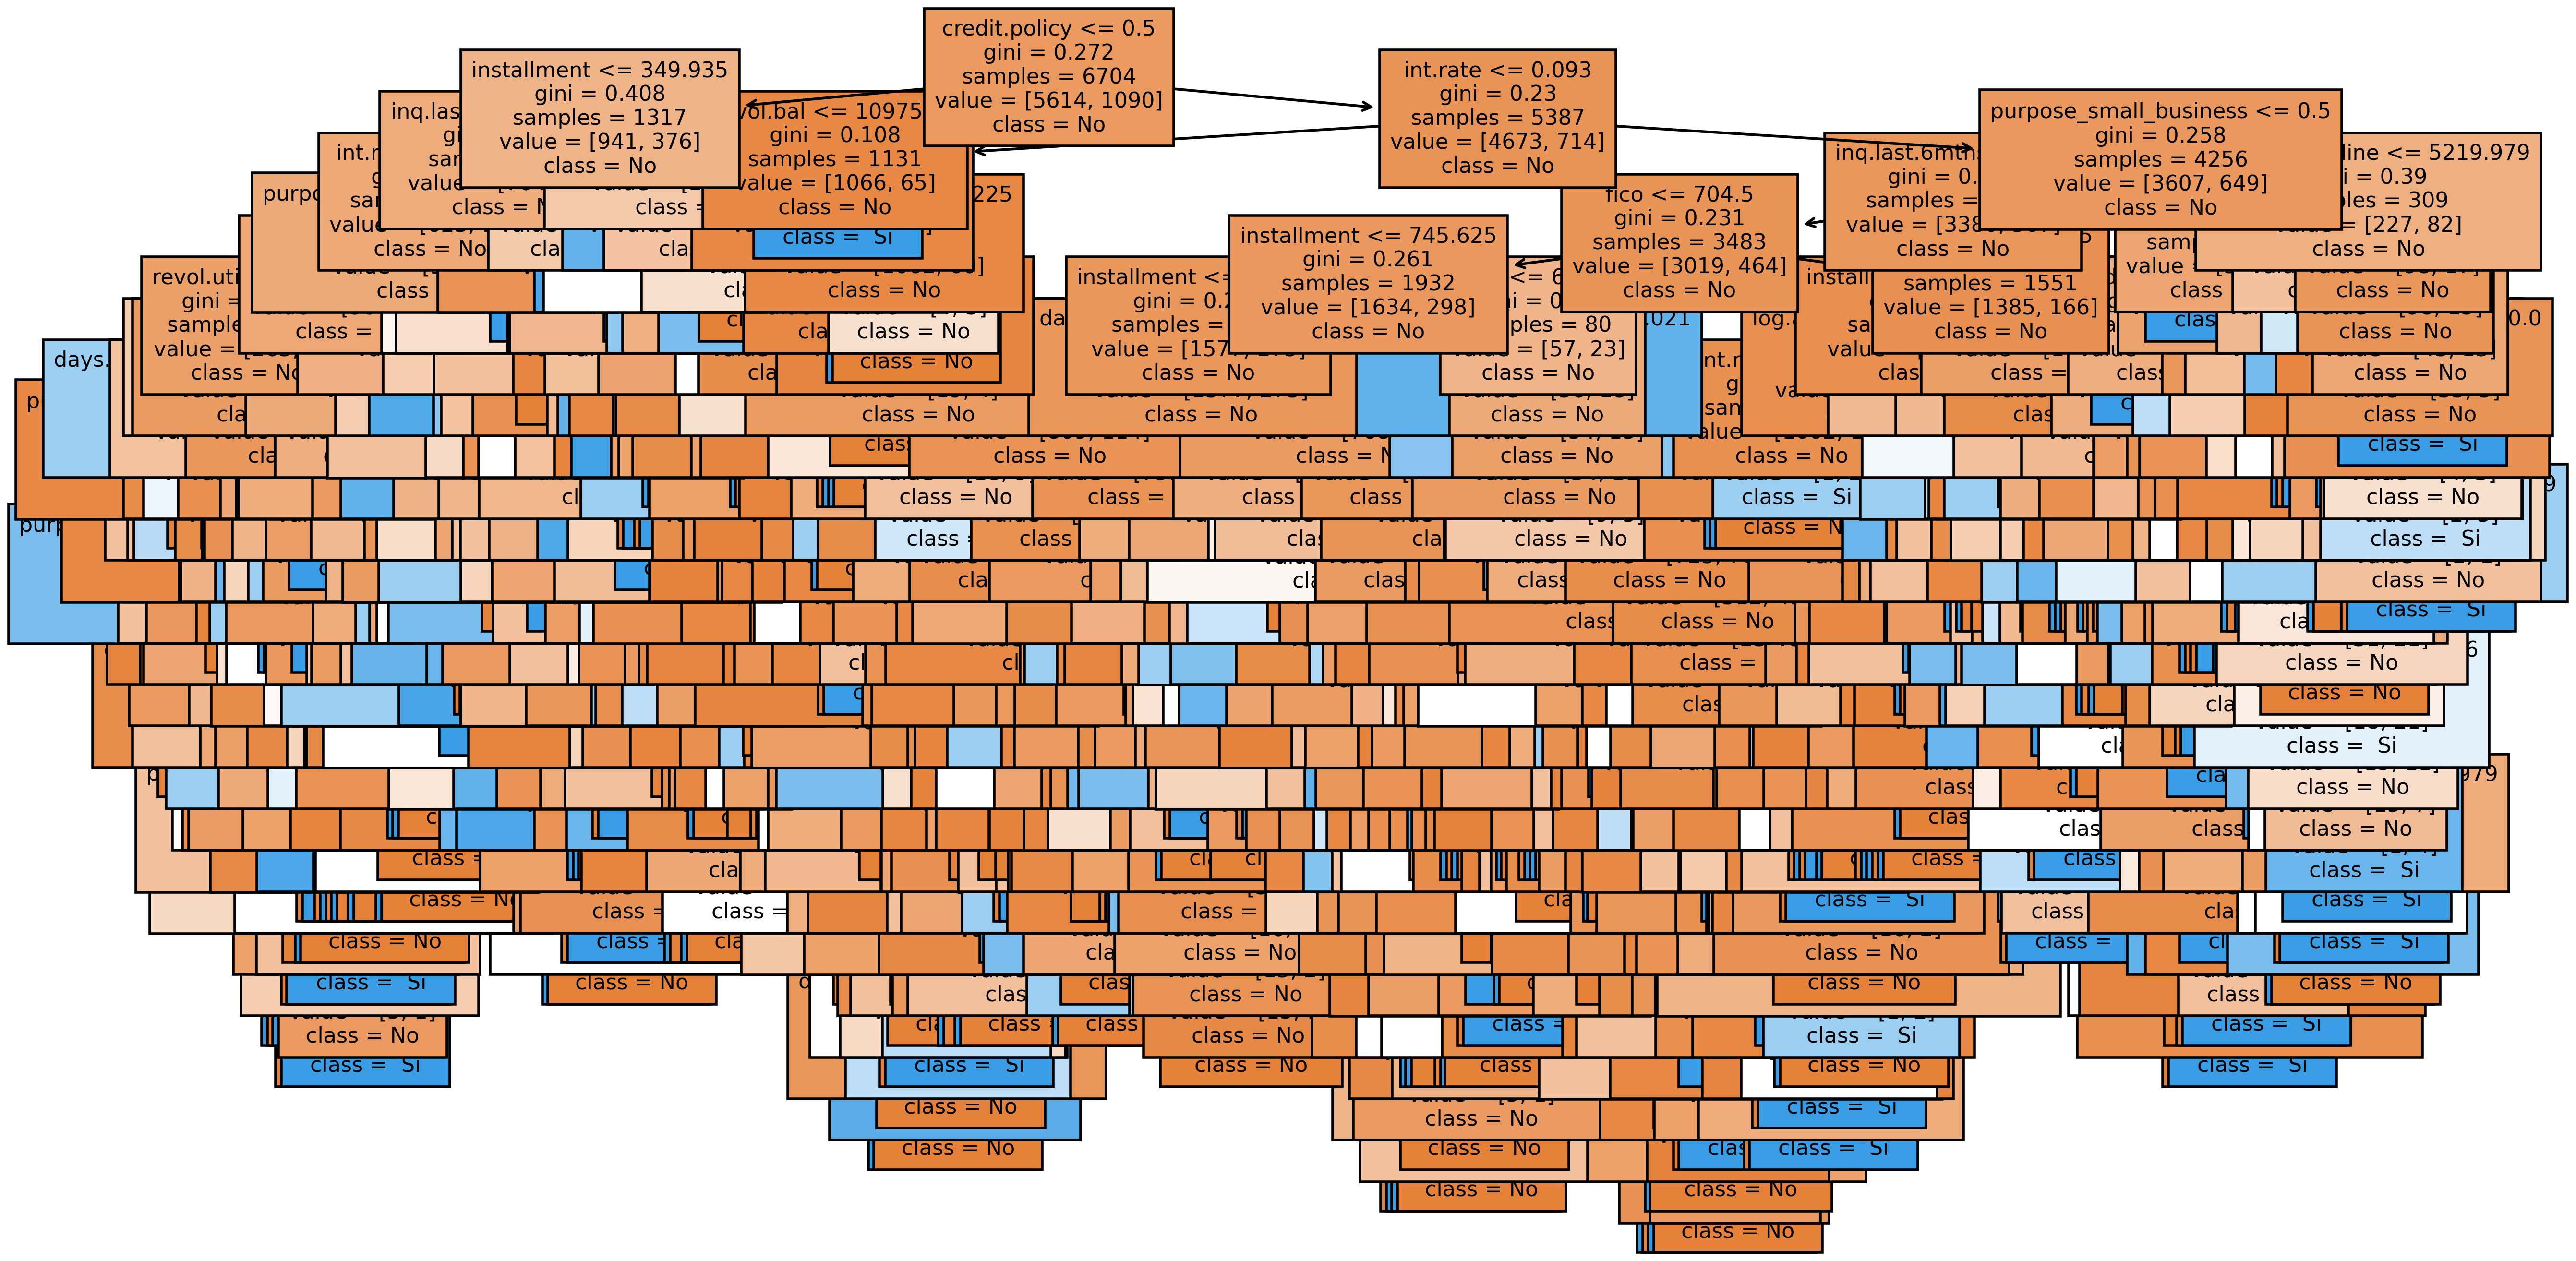

In [32]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=400)
tree.plot_tree(dtree,
               feature_names = X.columns.tolist(), 
               class_names=['No',' Si'],
               filled = True,
              fontsize=8);
fig.savefig('dtree.png')

## Entrenamiento del modelo de bosque aleatorio

¡Ahora es el momento de entrenar a nuestro modelo!

**Cree una instancia de la clase RandomForestClassifier y ajústela a nuestros datos de entrenamiento del paso anterior.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=600,max_depth=4)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=600)

## Predicciones y evaluación

Vamos a predecir los valores de y_test y evaluar nuestro modelo.

**Predecir la clase de no.fully.paid por los datos de X_test.**

In [27]:
predictions = rfc.predict(X_test)

**Ahora cree un reporte de clasificación a partir de los resultados. ¿Identificas algo extraño o algún tipo de advertencia?**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Revisa la Matriz de confusión para las predicciones.**

In [30]:
print(confusion_matrix(y_test,predictions))

[[2431    0]
 [ 443    0]]


**¿Qué funcionó mejor el bosque aleatorio o el árbol de decisiones?**

* Depende de la métrica que intentes optimizar.
* Observe el recall de cada clase de los modelos.
* Ninguno lo hizo muy bien, se necesita más ingeniería de variables o balanceo de datos (SMOTE)..

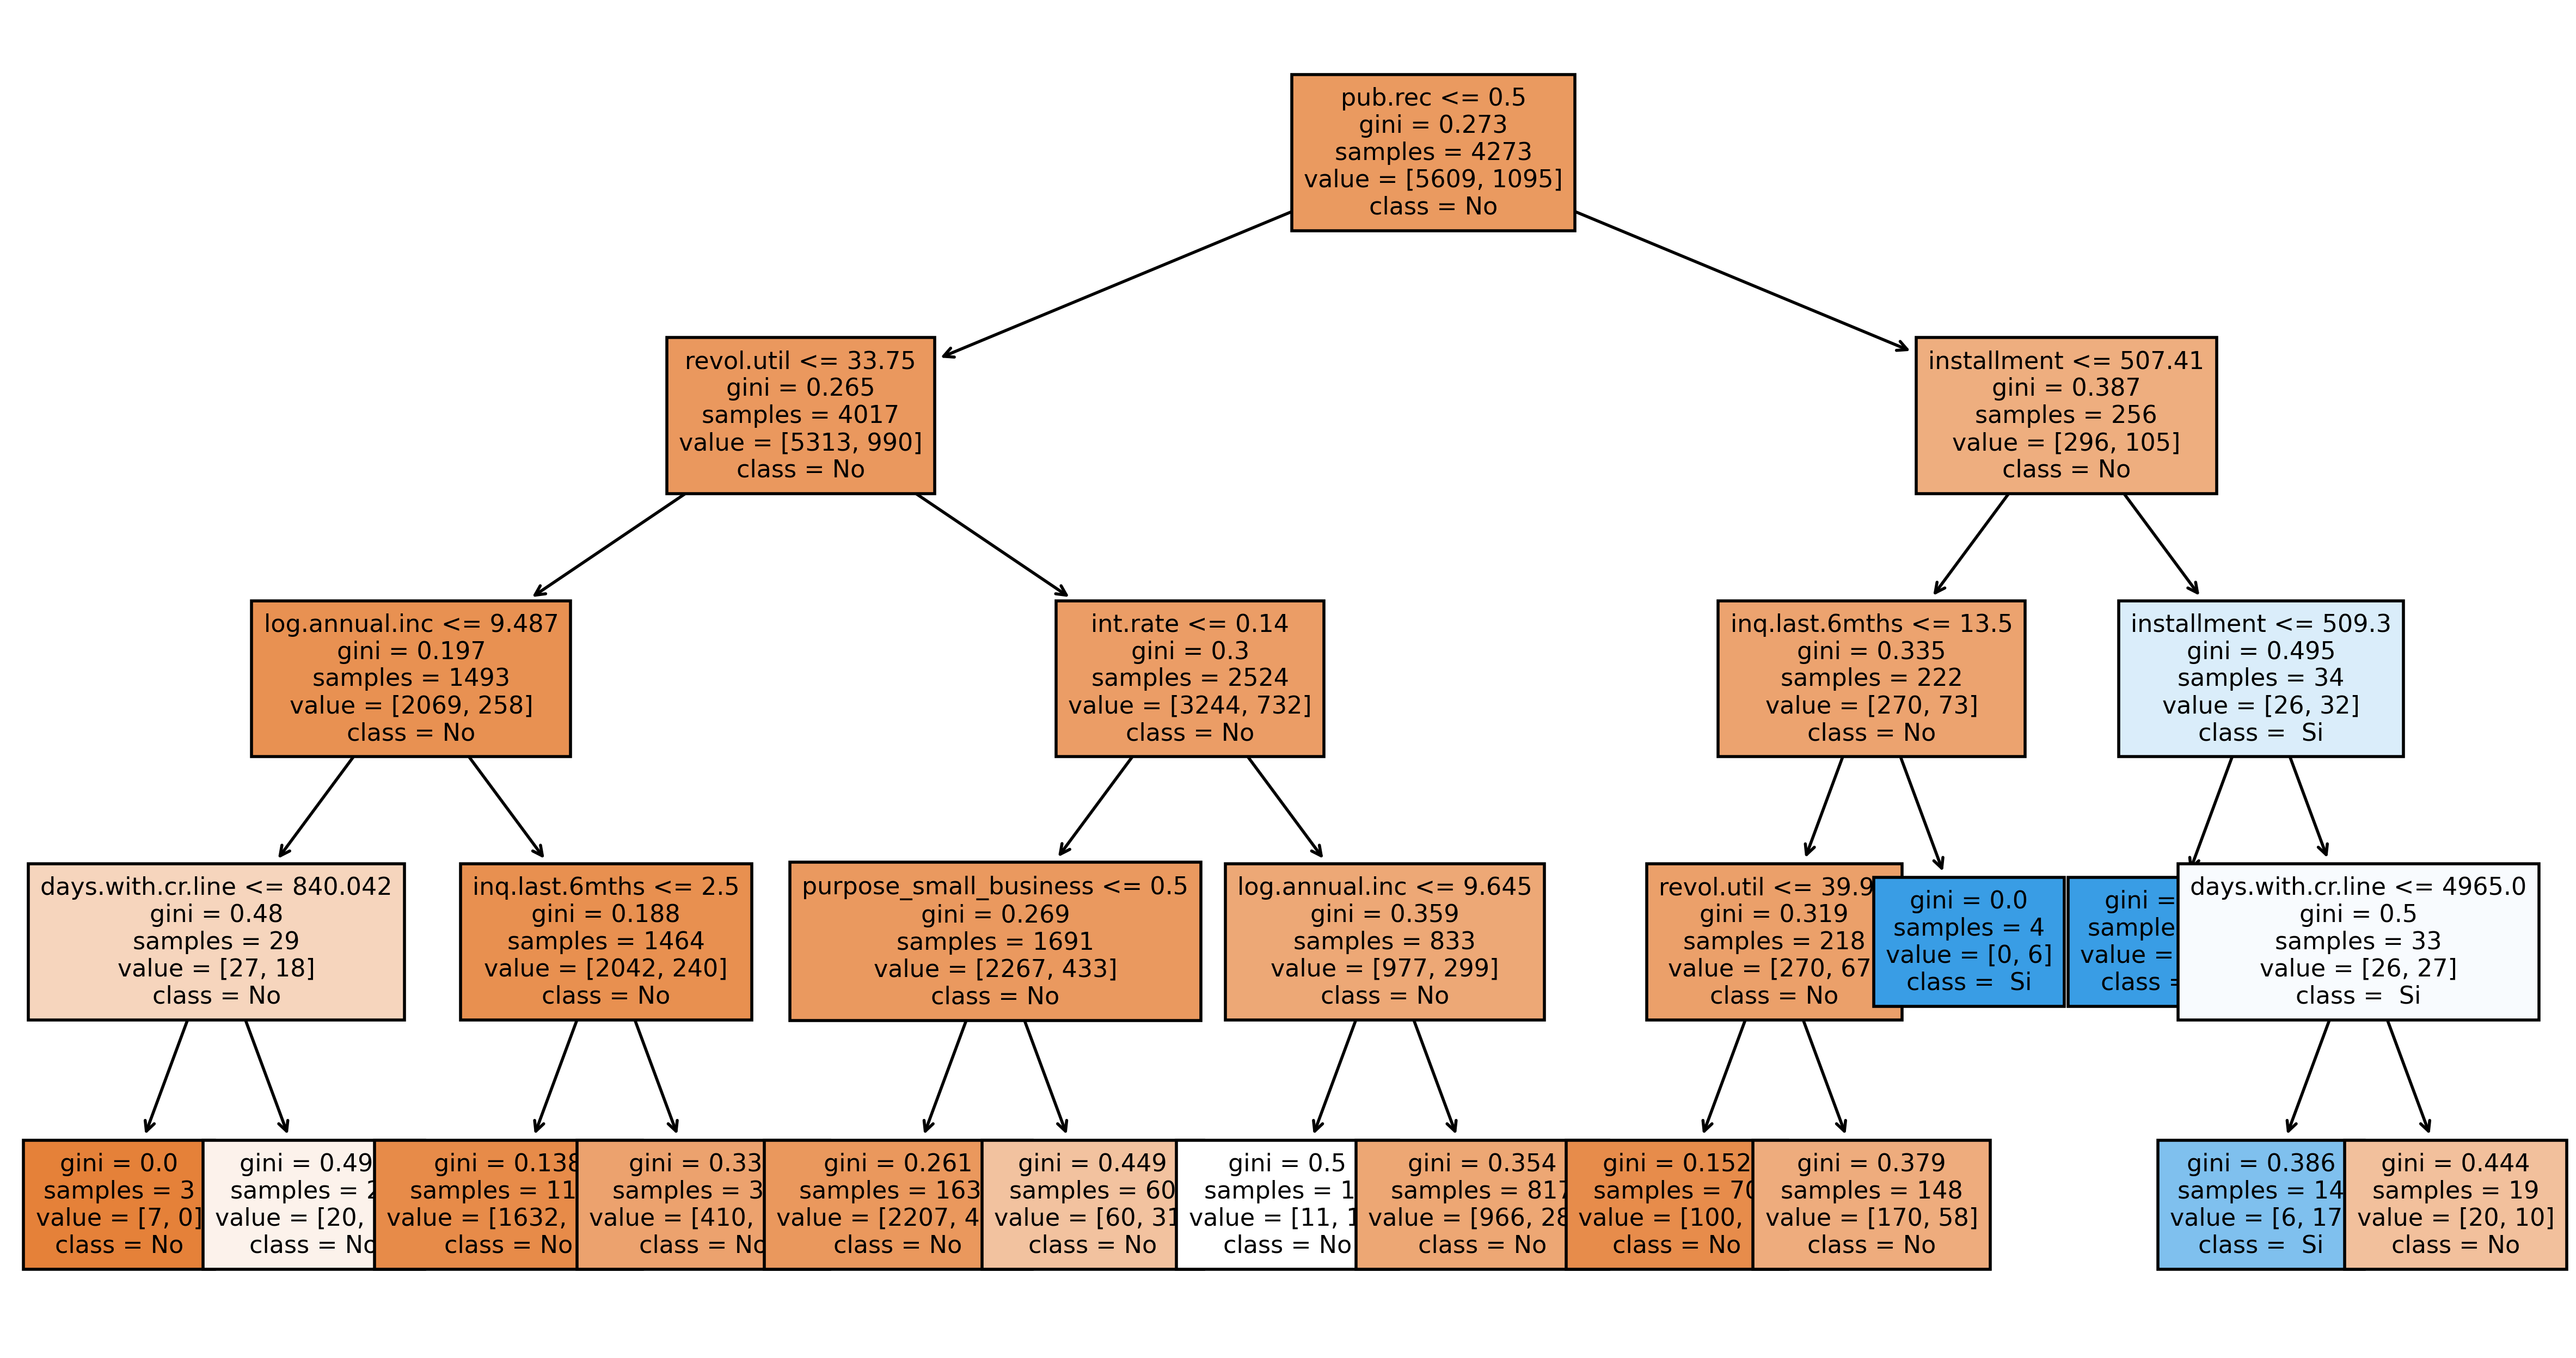

In [31]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=400)
tree.plot_tree(rfc.estimators_[1],
               feature_names = X.columns.tolist(), 
               class_names=['No',' Si'],
               filled = True,
              fontsize=8);
fig.savefig('rforest.png')